In [21]:
import os
import tensorflow_datasets as tfds
import tensorflow as tf

class DataSetGonzaloHoracio(tfds.core.GeneratorBasedBuilder):
    """DatasetBuilder personalizado para mi dataset de categorías de imágenes."""

    VERSION = tfds.core.Version('1.0.0')

    def _info(self):
        return tfds.core.DatasetInfo(
            builder=self,
            description="Dataset de imágenes con 12 categorías.",
            features=tfds.features.FeaturesDict({
                "image": tfds.features.Image(),
                "label": tfds.features.ClassLabel(names=['Animales', 'Barcos', 'Bosques', 'Ciudades', 'Desierto', 'Gastronomia', 'Montaña', 'Monumentos', 'Playa', 'Retrato', 'Ríos', 'Vehiculos']),
            }),
            supervised_keys=("image", "label"),
        )

    def _split_generators(self, dl_manager):
        return [
            tfds.core.SplitGenerator(
                name=tfds.Split.TRAIN,
                gen_kwargs={
                    "images_dir_path": r"C:\Users\Gonzalo\Desktop\Bootcamp\proyecto-final-gcb-hs\Imagenes",
                },
            ),
        ]

    def _generate_examples(self, images_dir_path):
        # Aquí necesitas asignar cada nombre de categoría a un índice numérico
        for category in tf.io.gfile.listdir(images_dir_path):
            if tf.io.gfile.isdir(os.path.join(images_dir_path, category)):
                for image_file in tf.io.gfile.listdir(os.path.join(images_dir_path, category)):
                    if image_file.endswith('.jpg') or image_file.endswith('.png'):
                        image_path = os.path.join(images_dir_path, category, image_file)
                        yield image_path, {
                            "image": image_path,
                            "label": self.info.features["label"].str2int(category),
                        }

In [22]:
tfds.core.DatasetBuilder.register(DataSetGonzaloHoracio)

__main__.DataSetGonzaloHoracio

In [3]:
import tensorflow_datasets as tfds
tfds.load('data_set_gonzalo_horacio', split='train')

c:\Users\Gonzalo\anaconda3\envs\gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [4]:
dataset, info = tfds.load('data_set_gonzalo_horacio', with_info=True, as_supervised=True)
print(info)

tfds.core.DatasetInfo(
    name='data_set_gonzalo_horacio',
    full_name='data_set_gonzalo_horacio/1.0.0',
    description="""
    Dataset de imágenes con 12 categorías.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/data_set_gonzalo_horacio',
    data_path='C:\\Users\\Gonzalo\\tensorflow_datasets\\data_set_gonzalo_horacio\\1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=6.45 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=12),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=11991, num_shards=64>,
    },
    citation="""""",
)


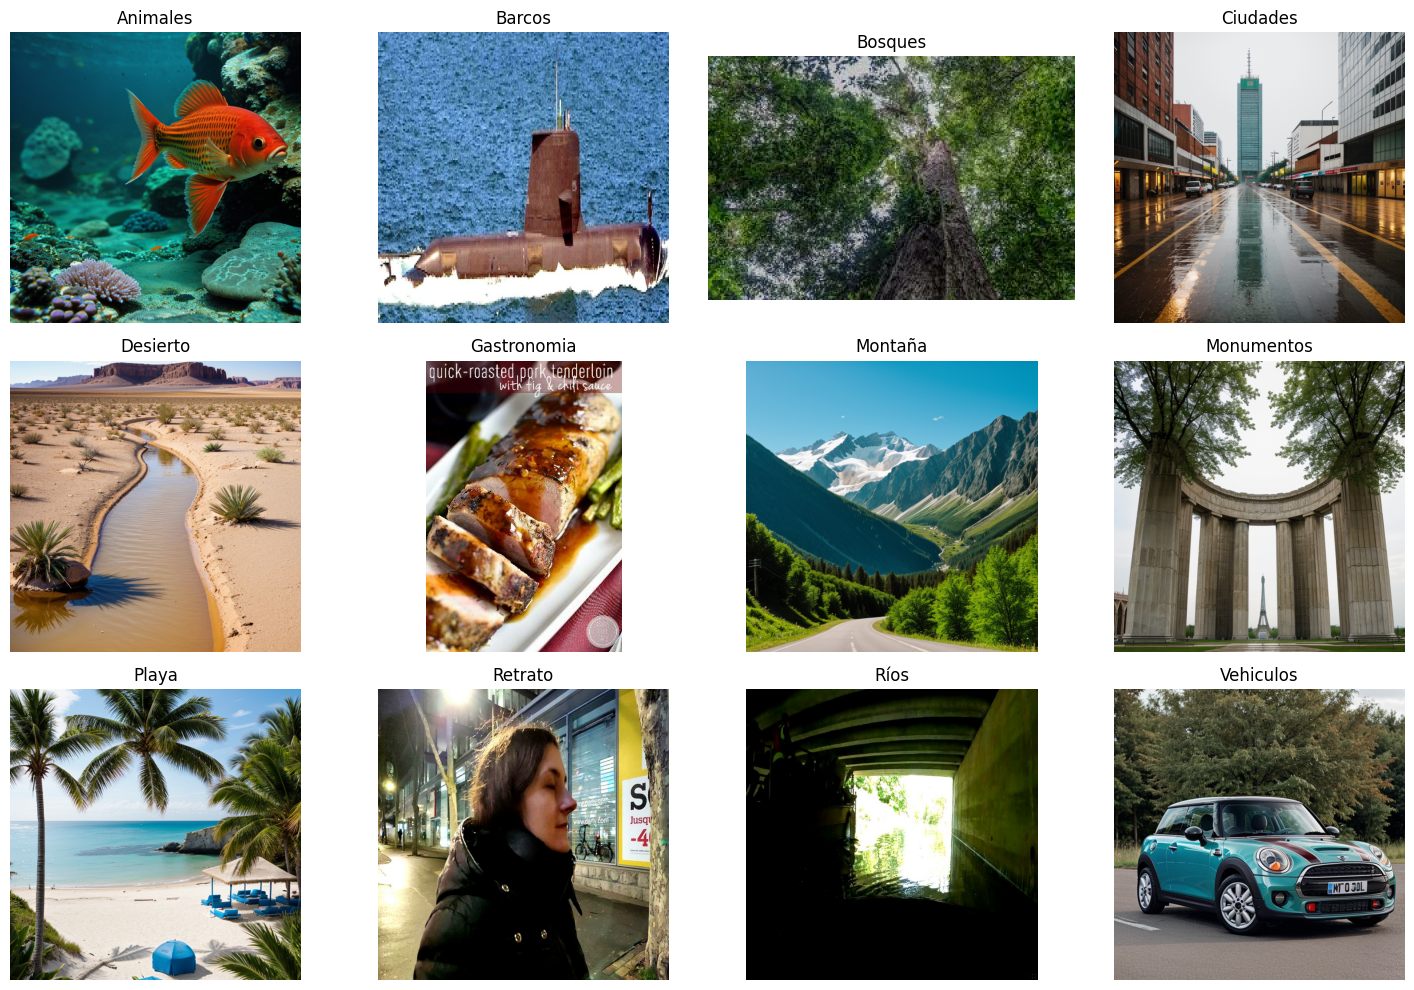

In [5]:
import matplotlib.pyplot as plt

# Primeramente, definimos el número total de categorías y un diccionario para almacenar las imágenes.
num_categorias = 12
imagenes_por_categoria = {cat: None for cat in range(num_categorias)}

# Inicializamos un contador para llevar la cuenta de cuántas categorías hemos encontrado.
categorias_encontradas = 0

# Iteramos sobre las primeras 1000 imágenes del dataset.
for image, label in dataset['train'].take(1000):
    # Convertimos la etiqueta de un tensor TensorFlow a un número entero.
    label_int = label.numpy()

    # Realizamos dos verificaciones aquí:
    # 1. Verificamos si 'label_int' es una clave en 'imagenes_por_categoria'. Esto debería ser siempre verdadero,
    #    ya que 'imagenes_por_categoria' fue inicializado para cubrir todas las categorías posibles.
    # 2. Verificamos si aún no hemos seleccionado una imagen para esta categoría, es decir,
    #    si el valor asociado con 'label_int' en 'imagenes_por_categoria' es 'None'.
    if label_int in imagenes_por_categoria and imagenes_por_categoria[label_int] is None:
        # Si ambas condiciones son verdaderas, significa que esta categoría aún no tiene una imagen asignada.
        # Asignamos la imagen actual a esta categoría en el diccionario.
        imagenes_por_categoria[label_int] = image

        # Incrementamos el contador de categorías encontradas.
        categorias_encontradas += 1

        # Si hemos encontrado imágenes para todas las categorías, detenemos el bucle.
        if categorias_encontradas == num_categorias:
            break

# Creamos una cuadrícula de subplots para visualizar las imágenes. La cuadrícula es de 3 filas por 4 columnas.
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Iteramos sobre cada categoría y su imagen correspondiente para mostrarlas.
for i, (label, image) in enumerate(imagenes_por_categoria.items()):
    axes[i].imshow(image.numpy())  # Mostramos la imagen en el subplot correspondiente.
    axes[i].set_title(info.features['label'].int2str(label))  # Ponemos el nombre de la categoría como título.
    axes[i].axis('off')  # Desactivamos los ejes para una visualización más limpia.

# Si hay subplots que no se usan (porque hay menos de 12 categorías), los ocultamos.
for ax in axes[num_categorias:]:
    ax.axis('off')

# Ajustamos el layout para que todo se vea ordenado y sin solapamientos.
plt.tight_layout()

# Finalmente, mostramos la cuadrícula de imágenes.
plt.show()


